# Exploratory Data Analysis (EDA) process with Pandas

Steps:
1. Load and Preview Data.
2. Summary Statistics.
3. Visualize Missing Values
4. Examine Distributions
5. Correlation Analysis.
6. Categorical Variable Analysis.
7. Time-Series Analysis.
8. Group and Aggregate Data.
9. Explore Feature Relationships.
10. Identify Patterns and Insights.

In [11]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

# Load the dataset
file_path = 'customer_purchases_cleaned.csv'
df = pd.read_csv(file_path)

# Quick overview of the dataset
df.info()

# Display the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      45 non-null     int64  
 1   Name            45 non-null     object 
 2   Age             45 non-null     float64
 3   Gender          45 non-null     object 
 4   PurchaseAmount  45 non-null     float64
 5   PurchaseDate    45 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.2+ KB


,CustomerID,Name,Age,Gender,PurchaseAmount,PurchaseDate
0,1,John Doe,40.0,Female,400.000000,2023-03-05
1,2,Jane Smith,40.0,Female,10000.000000,2023-03-05
2,3,Bob Brown,45.0,Female,100.000000,2023-03-12
3,4,Alice White,40.0,Male,2685.227273,2023-03-05
4,5,Charlie Black,35.0,Male,400.000000,2023-03-05


In [13]:
# Summary statistics
df.describe(include="all")

,CustomerID,Name,Age,Gender,PurchaseAmount,PurchaseDate
count,45.000000,45,45.000000,45,45.000000,45
unique,NaN,45,NaN,2,NaN,4
top,NaN,John Doe,NaN,Male,NaN,2023-03-05
freq,NaN,1,NaN,27,NaN,25
mean,25.377778,NaN,38.777778,NaN,2989.141414,NaN
std,14.691198,NaN,7.242202,NaN,4112.755063,NaN
min,1.000000,NaN,25.000000,NaN,100.000000,NaN
25%,13.000000,NaN,35.000000,NaN,300.000000,NaN
50%,26.000000,NaN,40.000000,NaN,400.000000,NaN
75%,38.000000,NaN,45.000000,NaN,2685.227273,NaN


In [15]:
# Check for missing values
df.isnull().sum()

CustomerID        0
Name              0
Age               0
Gender            0
PurchaseAmount    0
PurchaseDate      0
dtype: int64

In [17]:
# Check for duplicate rows
df.duplicated().sum()

0

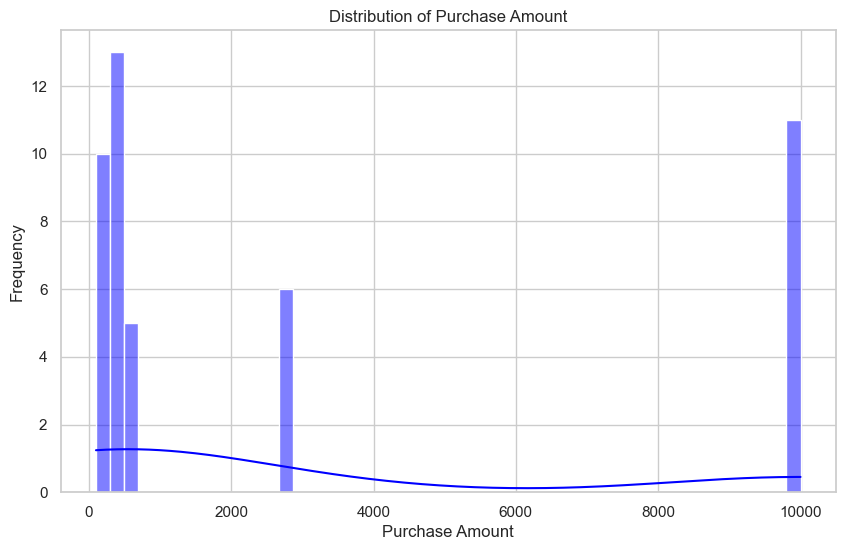

In [37]:
# Visualizing the distribution of PurchaseAmount
plt.figure(figsize=(10,6))
sns.histplot(df['PurchaseAmount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\48799\AppData\Local\Temp\ipykernel_5168\3137732724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='PurchaseAmount', data=df, palette='Set2')


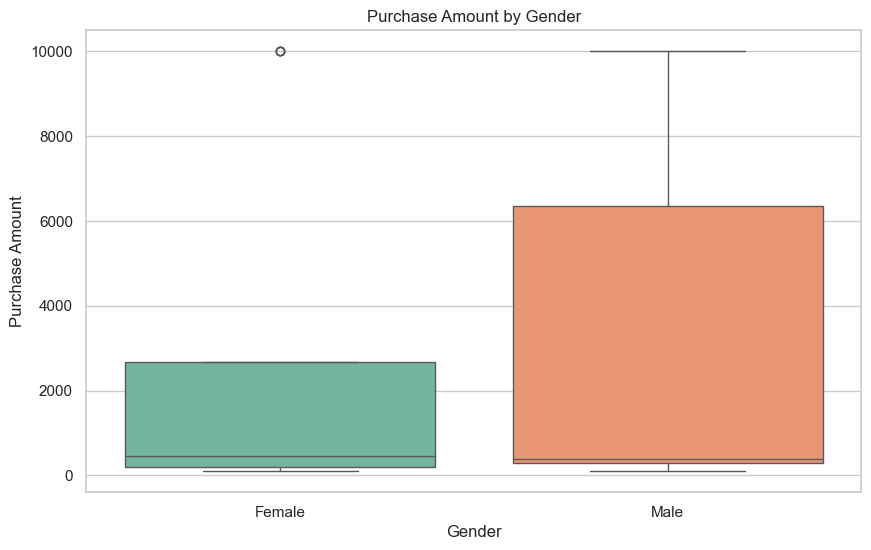

In [25]:
# Boxplot for PurchaseAmount by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='PurchaseAmount', data=df, palette='Set2')
plt.title("Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Purchase Amount")
plt.show()

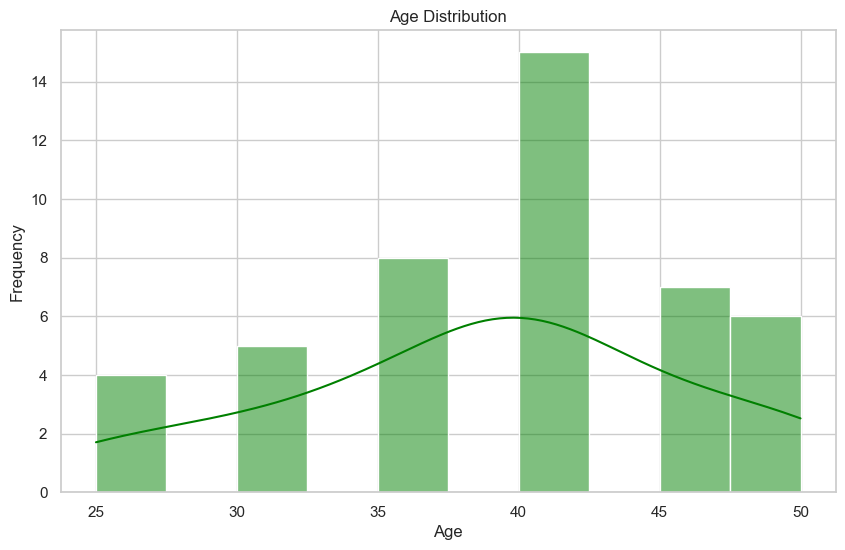

In [35]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

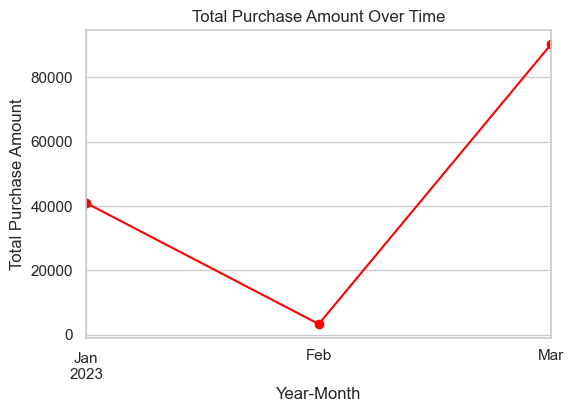

In [55]:
# Purchase trends over time
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['YearMonth'] = df['PurchaseDate'].dt.to_period('M')

plt.figure(figsize=(6, 4))
df.groupby('YearMonth')['PurchaseAmount'].sum().plot(marker='o', linestyle='-', color='red')
plt.title("Total Purchase Amount Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Purchase Amount")
plt.grid(True)
plt.show()

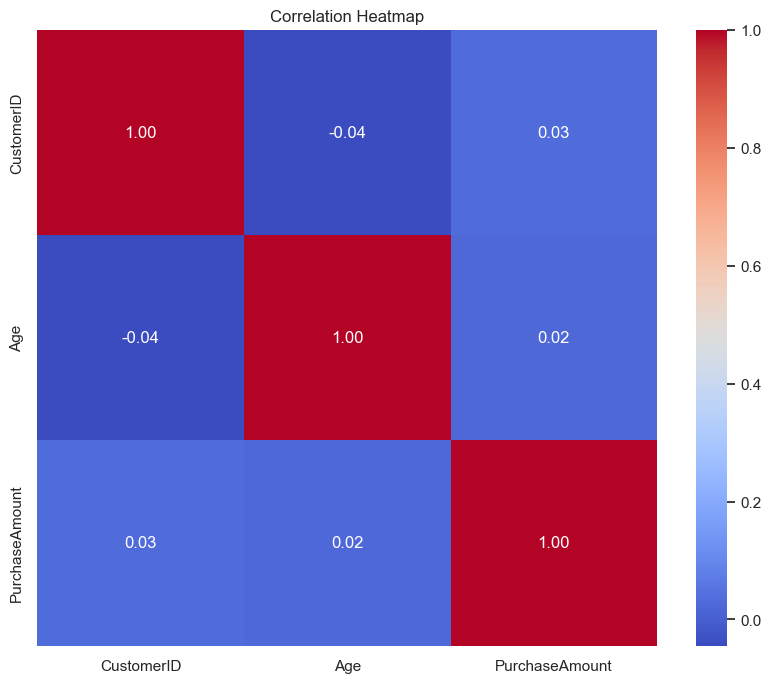

In [59]:
# Correlation heatmap
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [61]:
# Saving cleaned dataset to confirm EDA readiness
output_path = "eda_ready_dataset.csv"
df.to_csv(output_path, index=False)
print(f"\nEDA dataset saved to: {output_path}")


EDA dataset saved to: eda_ready_dataset.csv
